### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [55]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

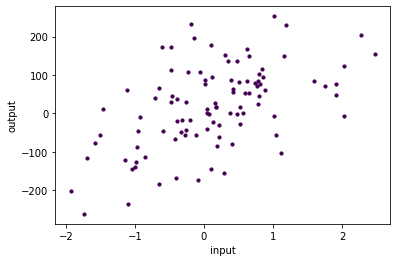

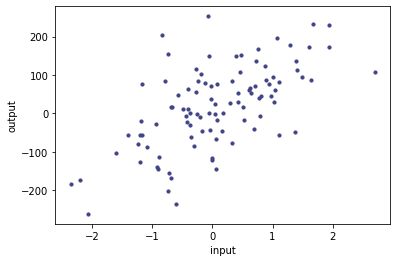

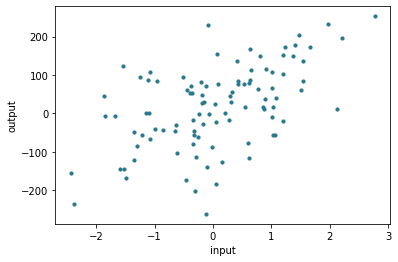

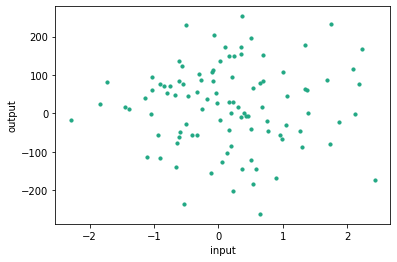

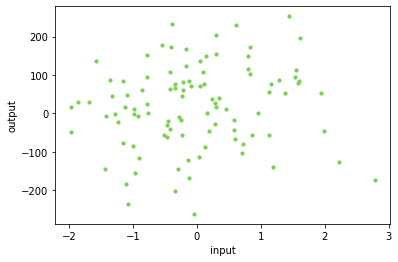

In [56]:
import matplotlib.pyplot as plt
for i in range(0,5):
  cmap = plt.get_cmap("viridis")
  plt.scatter(X[:,i],y,color=cmap(0.2*i),s=10)
  # plt.scatter(X_train[:,i],y_train,color=cmap(0.2*i),s=10)
  plt.xlabel("input")
  plt.ylabel("output")
  plt.show()

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [57]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
      self.r=learning_rate
      self.epoc=n_iters
    def fit(self, X, y):
      n,m=X.shape
      self.w=np.random.rand(m)
      self.b=1
      for i in range(self.epoc):
        y_new=np.dot(X,self.w)+self.b
        grad_w=((2/n)*(np.dot(X.T,(y_new-y))))
        grad_b=((2/n)*sum(y_new-y))
        self.w-=(self.r)*grad_w
        self.b-=(self.r)*grad_b
    def predict(self, X):
      return np.dot(X,self.w)+self.b

### Initializing, Training & Predictions

In [58]:

regressor = LinearRegression(learning_rate=0.00021, n_iters=10000)
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test) 

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [59]:
def mean_squared_error(predictions,true):
  return np.mean((predictions-true)**2)
def r2_score(predictions,y_test):
  a=np.dot((y_test-predictions),(y_test-predictions))
  b=np.mean(y_test)
  c=np.dot((y_test-b),(y_test-b))
  return np.sum(1-a/c)
mse = mean_squared_error(predictions,y_test) 
print("MSE:", mse)
accu = r2_score(predictions,y_test) 
print("Accuracy:", accu)

MSE: 385.94847698119463
Accuracy: 0.9635128968663526


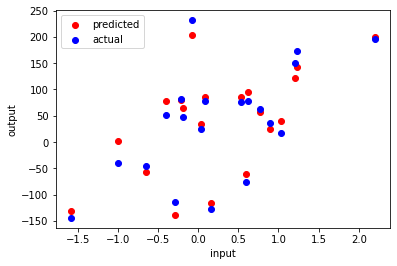

In [60]:
plt.scatter(X_test[:,2],predictions,c="red", label='predicted')
plt.scatter(X_test[:,2],y_test,c="blue",label='actual')
plt.legend()
plt.xlabel("input")
plt.ylabel("output")
plt.show()